In [1]:
from IPython.display import IFrame

In [2]:
IFrame("hw4.pdf", width=1000, height=1000)

## Problem 1

__[d]__

Recall our relation of $\epsilon$ and $\delta$ from lecture: $$ \epsilon = \sqrt{ \dfrac{8}{N} \ln{\dfrac{4 m_{\mathcal{H}}(2N)}{\delta}} } $$
where plugging in the bound $ m_{\mathcal{H}}(N) = N^{d_{VC}} $ gives $$ \epsilon = \sqrt{ \dfrac{8}{N} \ln{\dfrac{4 \cdot (2N)^{d_{VC}}}{\delta}} }. $$

We want 95% confidence that the generalization error is at most 0.05, or, in other words, $ \epsilon = 0.05 $ and $ \delta = 0.05 $, and we are given $ d_{VC} = 10 $. We want to find $N$ in the above equation, so we can plug these values in.

Plugging into our handy-dandy Wolfram Alpha and solving for $N$, we get $$ N = 452,957, $$ which is closest to the answer $ 460,000 $.

## Problem 2

With $ d_{VC} = 50 $ and $ \delta = 0.05 $, we want to plot the bounds
1. $$ \epsilon \leq \sqrt{ \dfrac{8}{N} \ln{\dfrac{4 m_{\mathcal{H}}(2N)}{\delta}} } $$
2. $$ \epsilon \leq \sqrt{ \dfrac{2 \ln(2Nm_{\mathcal{H}}(N))}{N} } + \sqrt{ \dfrac{2}{N} \ln \dfrac{1}{\delta} } + \dfrac{1}{N} $$
3. $$ \epsilon \leq \sqrt{ \dfrac{1}{N} \left( 2 \epsilon + \ln \dfrac{6m_{\mathcal{H}}(2N)}{\delta} \right) }$$
4. $$ \epsilon \leq \sqrt{ \dfrac{1}{2N} \left( 4\epsilon(1+\epsilon) + \ln \dfrac{4m_{\mathcal{H}}(N^2)}{\delta} \right) }$$

Let's try just one of these to see how things go.

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
def VC_bound(n):
    return math.sqrt( (8 / n) * math.log((n**(50)) / 0.05) )

In [10]:
def RP_bound(n):
    return math.sqrt( (2 * math.log( 2 * n * n**(50) ) / n) ) + math.sqrt( (2 / n) * math.log(1 / 0.05) ) + (1/n)

In [ ]:
def PVB_bound(n):
    return math.sqrt( (8 / n) * ( 2 math.log((n**(50)) / 0.05) ) )

In [24]:
delta = 100
xrange = np.arange(1, 10000, delta)
yrange = np.arange(1, 10000, delta)
n, e = np.meshgrid(xrange,yrange)

In [25]:
F = e
G = np.sqrt( (1 / n) * ( 2*e + np.log( (6 * n**(50)) / 0.05 )  ) )
# G = np.vectorize(G1)

C:\Python35\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


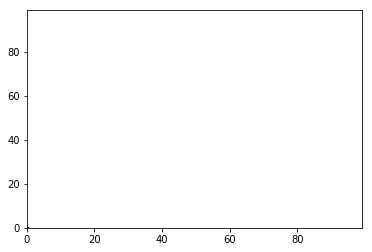

In [26]:
plt.contour((F - G), [0])
plt.show()

In [ ]:
def D_bound(n):
    return math.sqrt( (1 / n) * math.log((n**(50)) / 0.05) )

In [7]:
f = np.vectorize(VC_bound)

In [12]:
f2 = np.vectorize(RP_bound)

In [ ]:
# we'll write the confusing PVB bound so it can  be placed below.

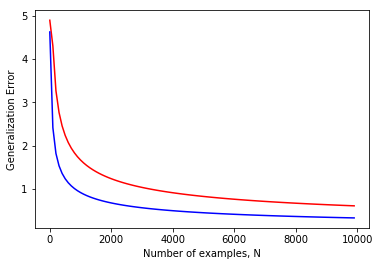

In [13]:
t = np.arange(1.0, 10000.0, 100)

plt.plot(t, f(t), 'r', t, f2(t), 'b')
plt.xlabel("Number of examples, N")
plt.ylabel("Generalization Error")
plt.show()

## Problem 3

## Problem 4

__[e]__

We want to minimize the mean-squared error $ \left( \overline{g}(x) - f(x) \right)^2 $, or in this case the area of $ \left( \hat{a}x - \sin(\pi x) \right)^2 $.

So we'll minimize $$ \int_{-1}^{1} \left( \sin(\pi x) - \hat{a}x \right)^2 dx $$

We'll ask wolfram for "derivative of integral of (sin(pi*x)-(a*x))^2 from -1 to 1 with respect to a", which gives $$ \dfrac{4a}{3} - \dfrac{4}{\pi}. $$

We'll simulate this by picking two random points from $ \sin(\pi x) $ in the interval $ [-1,1] $, approximating with $ax$ to get the minimum squared error and use that.

In [28]:
math.sin(math.pi)

1.2246467991473532e-16

In [52]:
def pick_two_points():
    # returns two random values from sin(pi * x) in the interval x = [-1,1], with both the x and y values.
    x1 = np.random.uniform(-1,1)
    x2 = np.random.uniform(-1,1)
    
    y1 = math.sin(math.pi * x1)
    y2 = math.sin(math.pi * x2)
    
    pt1 = np.array([x1,y1])
    pt2 = np.array([x2,y2])
    
    return pt1,pt2

In [53]:
x1,x2 = pick_two_points()

In [54]:
x1,x2

(array([-0.06878031, -0.21440216]), array([-0.64963093, -0.89153232]))

In [55]:
x1[1]

-0.21440216378085486

In [35]:
x1[1] = math.sin(math.pi * x1[1])

In [36]:
x1

array([-0.90496046,  0.91412441])

In [56]:
X = np.array([[x1[0]], [x2[0]]])

In [57]:
X

array([[-0.06878031],
       [-0.64963093]])

In [58]:
y = np.array([[x1[1]], [x2[1]]])

In [59]:
y

array([[-0.21440216],
       [-0.89153232]])

In [60]:
X_inv = np.linalg.pinv(X)
X_inv

array([[-0.16117197, -1.52227134]])

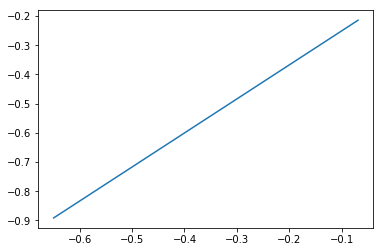

In [61]:
plt.plot(X,y)
plt.show()

In [45]:
w = X_inv.dot(y)

In [46]:
w

array([[-0.46268055]])

This is the value of a that we have to work with.

In [47]:
def approx_line(pt1, pt2):
    """
    creates a line of the form y = ax that gives the best approximation to the line between two points
    """
    X = np.array([[pt1[0]], [pt2[0]]])
    y = np.array([[pt1[1]],[pt2[1]]])
    
    X_inv = np.linalg.pinv(X)
    a = X_inv.dot(y)
    
    return a

In [65]:
def target(x):
    return np.sin(np.pi * x[0])

In [86]:
training_set = np.array([[random.uniform(-1, 1)] for n in range(1000)])
subset = random.sample(list(training_set), 2)
subset

[array([-0.27711117]), array([-0.17907893])]

For testing purposes going to use another LR.

In [81]:
class Model:
    def __init__(self,
                 training_set=None,
                 testing_set=None):
        self.training_set = training_set
        self.testing_set = testing_set

In [82]:
class LinearRegression(Model):
    def __init__(self, training_set=None, testing_set=None):
        Model.__init__(self, training_set, testing_set)
        self.weights = np.array([0., 0., 0.])
        # points that define the target function
        self.point1 = (random.uniform(-1, 1), random.uniform(-1, 1))
        self.point2 = (random.uniform(-1, 1), random.uniform(-1, 1))

    def target(self, feature):
        x = feature[1]
        y = feature[2]
        x1, y1 = self.point1
        x2, y2 = self.point2
        slope = (y2 - y1) / (x2 - x1)
        # simple check to see if point (x, y) is above or below the line
        return 1 if y > (slope * (x - x1) + y1) else -1

    def train(self, noise=None):
        data_matrix = np.array(self.training_set)
        target_vector = np.array([[self.target(point)] for point in self.training_set])

        if noise is not None:
            self.add_noise(target_vector, noise)

        # normal equations linear regression
        pinv = np.linalg.pinv(data_matrix)
        self.weights = np.dot(pinv, target_vector)

    def add_noise(self, targets, noise):
        noisy_points = set()
        num_points = len(self.testing_set)
        cap = int(num_points * noise)

        while len(noisy_points) < cap:
            index = random.randint(0, num_points - 1)
            if not index in noisy_points:
                targets[index][0] *= -1
                noisy_points.add(index)

    def test(self, noise=None):
        targets = np.array([[self.target(point)] for point in self.testing_set])

        if noise is not None:
            self.add_noise(targets, noise)

        tys = np.sign(np.dot(self.testing_set, self.weights))
        return len(targets[tys != targets]) / float(len(targets))

In [78]:
import random

In [89]:
def run_experiment(num_times):
    """
    run a number of experiments where we generate points on sinusoid distribution and get value of a
    """
    
    weights = []
    avg_a = 0
    
    training_set = np.array([[random.uniform(-1, 1)] for i in range(num_times)])
    targets = np.array([[target(point)] for point in training_set])
    
    for i in range(num_times):
        subset = random.sample(list(training_set), 2)
        lr = LinearRegression(subset)
        lr.target = target
        lr.train()
        weights += [lr.weights.T[0]]
        
    gbar = np.mean(weights)
    
    gbar_targets = np.dot(training_set, gbar.T)
    
    # bias is the squared error
    bias = np.mean((gbar_targets - targets) ** 2)
    
    weights = np.array(weights)
    
    # now compare every generated hypothesis in weights
    # with the average hypothesis gbar
    ranked_hypotheses = np.dot(training_set, weights.T)
    variance = []
    
    for i in range(len(ranked_hypotheses)):
        g = np.array([ranked_hypotheses[:, i]]).T
        variance += [np.mean((g - gbar_targets) ** 2)]
                     
    variance = np.mean(variance)

    return (gbar, bias, variance)

In [90]:
gbar, bias, variance = run_experiment(10000)

In [91]:
gbar

1.4336332651390957

We are asked to match an _exact_ value--we get 1.43, which matches __none__ of the multiple-choice answers.

## Problem 5

__[b]__

In [92]:
bias

0.27087272836959397

## Problem 6

__[a]__

In [93]:
variance

0.24002194647030187

## Problem 7

## Problem 8

__[c]__

For $ q > N $, $ {N \choose q } = 0 $. So, until we reach a value of $N$ where $N \geq q$, we have $ m_{\mathcal{H}}(N+1) = 2m_{\mathcal{H}}(N) $.

We know that for $N=1$, $m_{\mathcal{H}}(N) = 2 = 2^1$, so until $N=q$ we have $m_{\mathcal{H}}(N) = 2^N$.

Now we see that $$ m_{\mathcal{H}}(q+1) = 2m_{\mathcal{H}}(q) - {q \choose q}, $$ which means $$ m_{\mathcal{H}}(q+1) < 2^{q+1}. $$

We have that if there is _no_ break point, then $ m_{\mathcal{H}}(N) = 2^N $, which is true here until we get to $q+1$ meaning that $q+1$ is the break point.

Thus, $$ d_{VC} = q. $$

## Problem 9

__[b]__

## Problem 10